# 5 Tips To Get Started - Data Analytics for Engineers 

*Wednesday 21th of February 2018* 

## 0. Keeping track of absence + Group Formation

In [45]:
# Note about set-up demos (watching vs doing)

## 1. Using for-loops with plots

In [46]:
import matplotlib as plt 
import pandas as pd
%matplotlib inline

# import data
student_grades = pd.read_csv("http://bit.ly/dae_student_grades")

In [47]:
# inspect data
student_grades.head()

# what does NaN mean? 

,student,assignment1,assignment2,homework,exam,resit
0,Sem,6.7,7.5,9.5,7.8,NaN
1,Lucas,8.2,8.2,10.0,6.9,NaN
2,Tess,9.0,9.8,10.0,9.2,NaN
3,Adam,5.0,4.9,10.0,3.4,5.8
4,James,3.4,5.3,8.0,4.9,6.2


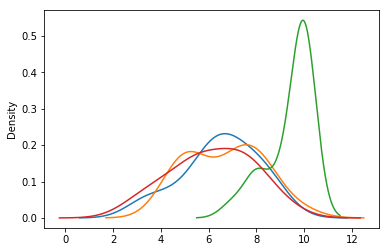

In [48]:
# plot distribution of multiple columns
student_grades['assignment1'].plot(kind='density')
student_grades['assignment2'].plot(kind='density')
student_grades['homework'].plot(kind='density')
student_grades['exam'].plot(kind='density');

# what is the problem of this approach?

In [49]:
# inspect columns
student_grades.columns

Index(['student', 'assignment1', 'assignment2', 'homework', 'exam', 'resit'], dtype='object')

In [50]:
# how do we select the following four columns: 
# "assignment1", "assignment2", "homework", "exam"

In [51]:
student_grades.columns[1:5] # 1 inclusive; #5 exclusive

Index(['assignment1', 'assignment2', 'homework', 'exam'], dtype='object')

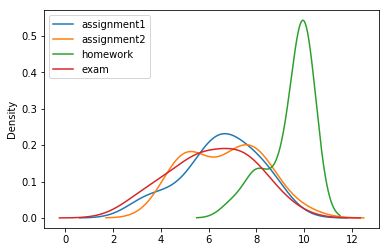

In [52]:
# better way: 
for column in student_grades.columns[1:5]: 
    student_grades[column].plot(kind='density', label=column, legend=True)
# what conclusion can we draw from this graph?

## 2. Interquartile Range (IQR)

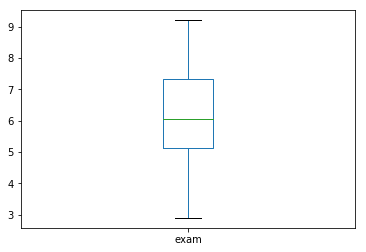

In [53]:
# visual representation for exam grades:
student_grades['exam'].plot(kind='box');

In [54]:
# Q1 (25% percentile)
student_grades['exam'].quantile(0.25)

5.125

In [55]:
# Q1 (25%), Q2 (50%), Q3 (75%), Q4 (100%)
student_grades['exam'].quantile([0.25, 0.50, 0.75, 1])

0.25    5.125
0.50    6.050
0.75    7.325
1.00    9.200
Name: exam, dtype: float64

In [56]:
# calculate IQR (distance between Q3 and Q1) in one line of code
iqr = student_grades['exam'].quantile(0.75) - student_grades['exam'].quantile(0.25) 

In [57]:
# lower limit IQR = Q1 - 1.5 * IQR
lower_limit = student_grades['exam'].quantile(0.25) - 1.5 * iqr
# upper limit IQR = Q3 + 1.5 * IQR
upper_limit = student_grades['exam'].quantile(0.75) + 1.5 * iqr
print(lower_limit, upper_limit)

1.825000000000001 10.624999999999998


## 3. Masks / Filters

In [58]:
student_grades.head()

,student,assignment1,assignment2,homework,exam,resit
0,Sem,6.7,7.5,9.5,7.8,NaN
1,Lucas,8.2,8.2,10.0,6.9,NaN
2,Tess,9.0,9.8,10.0,9.2,NaN
3,Adam,5.0,4.9,10.0,3.4,5.8
4,James,3.4,5.3,8.0,4.9,6.2


In [59]:
# average grade of all students who didn't take the resit? 
student_grades['resit'].isnull()

0      True
1      True
2      True
3     False
4     False
5      True
6      True
7      True
8      True
9     False
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17    False
18     True
19     True
Name: resit, dtype: bool

In [60]:
# assign filter to variable
filter = student_grades['resit'].isnull()
student_grades.loc[filter] 

,student,assignment1,assignment2,homework,exam,resit
0,Sem,6.7,7.5,9.5,7.8,NaN
1,Lucas,8.2,8.2,10.0,6.9,NaN
2,Tess,9.0,9.8,10.0,9.2,NaN
5,Max,4.5,4.4,10.0,5.6,NaN
6,Fleur,7.0,8.6,10.0,5.9,NaN
7,Zoë,3.4,7.4,10.0,7.3,NaN
8,Luuk,8.4,5.4,10.0,6.1,NaN
10,Ilja,6.3,6.6,7.0,5.4,NaN
11,Dirk,8.4,7.3,10.0,6.0,NaN
12,Pieter,7.1,5.3,10.0,8.4,NaN


In [61]:
# or in one go: 
student_grades.loc[student_grades['resit'].isnull()] 

,student,assignment1,assignment2,homework,exam,resit
0,Sem,6.7,7.5,9.5,7.8,NaN
1,Lucas,8.2,8.2,10.0,6.9,NaN
2,Tess,9.0,9.8,10.0,9.2,NaN
5,Max,4.5,4.4,10.0,5.6,NaN
6,Fleur,7.0,8.6,10.0,5.9,NaN
7,Zoë,3.4,7.4,10.0,7.3,NaN
8,Luuk,8.4,5.4,10.0,6.1,NaN
10,Ilja,6.3,6.6,7.0,5.4,NaN
11,Dirk,8.4,7.3,10.0,6.0,NaN
12,Pieter,7.1,5.3,10.0,8.4,NaN


In [62]:
# calculate the mean exam grade for this subset of students
student_grades.loc[student_grades['resit'].isnull(), 'exam'].mean()

6.913333333333332

In [63]:
# verify result with overall mean
student_grades.loc[:, 'exam'].mean()
# does this value make sense compared to the previous block? Why?

6.16

In [64]:
# BONUS - what is the highest grade for the first exam attempt of all students who took the resit
# Try to find the answer without visually observing the data!

In [65]:
# investigate resit column
student_grades['resit'].head()

0    NaN
1    NaN
2    NaN
3    5.8
4    6.2
Name: resit, dtype: float64

In [66]:
# the filter we used in the previous exercise
student_grades['resit'].isnull().head()

0     True
1     True
2     True
3    False
4    False
Name: resit, dtype: bool

In [67]:
# negate the filter 
~student_grades['resit'].isnull().head()

0    False
1    False
2    False
3     True
4     True
Name: resit, dtype: bool

In [68]:
# apply filter and select column to only get students who took the resit
student_grades.loc[~student_grades['resit'].isnull(), 'exam']

3     3.4
4     4.9
9     4.3
13    2.9
17    4.0
Name: exam, dtype: float64

In [69]:
# take the maximum value of the exam (not the resit!) column
student_grades.loc[~student_grades['resit'].isnull(), 'exam'].max()

4.9000000000000004

## 4. Sorting data

In [70]:
# who are the top 3 performing students for assignment 1?
# grades assignment 1 (unsorted)
student_grades['assignment1']

0     6.7
1     8.2
2     9.0
3     5.0
4     3.4
5     4.5
6     7.0
7     3.4
8     8.4
9     5.7
10    6.3
11    8.4
12    7.1
13    7.3
14    5.9
15    6.1
16    6.4
17    6.1
18    8.0
19    7.3
Name: assignment1, dtype: float64

In [71]:
# sort grades 
student_grades['assignment1'].sort_values(ascending=False)
# tip: use SHIFT + TAB (to view common function parameters)

2     9.0
8     8.4
11    8.4
1     8.2
18    8.0
19    7.3
13    7.3
12    7.1
6     7.0
0     6.7
16    6.4
10    6.3
15    6.1
17    6.1
14    5.9
9     5.7
3     5.0
5     4.5
7     3.4
4     3.4
Name: assignment1, dtype: float64

In [72]:
# change to descending order (from high to low)
student_grades['assignment1'].sort_values(ascending=False)

2     9.0
8     8.4
11    8.4
1     8.2
18    8.0
19    7.3
13    7.3
12    7.1
6     7.0
0     6.7
16    6.4
10    6.3
15    6.1
17    6.1
14    5.9
9     5.7
3     5.0
5     4.5
7     3.4
4     3.4
Name: assignment1, dtype: float64

In [73]:
# select only the first 3 records (index 0, 1 and 2)
student_grades['assignment1'].sort_values(ascending=False)[:3]

2     9.0
8     8.4
11    8.4
Name: assignment1, dtype: float64

In [74]:
# So what is our final answer? Is that the answer we are after? 

In [75]:
# No! We want to know the student names; not just the row indices

In [76]:
# select student name and assignment1 grade
student_grades[['student', 'assignment1']]

,student,assignment1
0,Sem,6.7
1,Lucas,8.2
2,Tess,9.0
3,Adam,5.0
4,James,3.4
5,Max,4.5
6,Fleur,7.0
7,Zoë,3.4
8,Luuk,8.4
9,Noor,5.7


In [77]:
student_grades[['student', 'assignment1']].sort_values(by='assignment1', ascending=False)[:3]
# why do we need to include the "by-parameter" in this case?

,student,assignment1
2,Tess,9.0
11,Dirk,8.4
8,Luuk,8.4


## 5. Working with Dates

In [78]:
# how do I only select the dates in February
lab_session_dates = pd.read_csv("http://bit.ly/dae_lab_session_dates")
lab_session_dates.head()

,dates
0,2018-02-05
1,2018-02-07
2,2018-02-19
3,2018-02-21
4,2018-02-26


In [79]:
# convert to a date/time datatype
lab_session_dates['dates'] = pd.to_datetime(lab_session_dates['dates'])

In [80]:
# extract month 
lab_session_dates['dates'].dt.month

0     2
1     2
2     2
3     2
4     2
5     2
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
Name: dates, dtype: int64

In [81]:
filter = lab_session_dates['dates'].dt.month == 2

In [82]:
# use filter to select dates in February
lab_session_dates.loc[lab_session_dates['dates'].dt.month == 2]

,dates
0,2018-02-05
1,2018-02-07
2,2018-02-19
3,2018-02-21
4,2018-02-26
5,2018-02-28


In [83]:
# create a new column "on_monday" that indicates True if the specific date
# was on Monday, otherwise it should be False
# you may need to look up pandas documentation

In [84]:
lab_session_dates['dates'].dt.weekday_name

0        Monday
1     Wednesday
2        Monday
3     Wednesday
4        Monday
5     Wednesday
6        Monday
7     Wednesday
8        Monday
9     Wednesday
10       Monday
11    Wednesday
12       Monday
13    Wednesday
Name: dates, dtype: object

In [85]:
# create filter
lab_session_dates['dates'].dt.weekday_name == "Monday"

0      True
1     False
2      True
3     False
4      True
5     False
6      True
7     False
8      True
9     False
10     True
11    False
12     True
13    False
Name: dates, dtype: bool

In [86]:
# rows of which the date is equal to Monday get assigned True in a new column called 'on_monday'
lab_session_dates.loc[lab_session_dates['dates'].dt.weekday_name == "Monday", 'on_monday'] = True
# rows of which the date is not equal to Monday (e.g. Wednesday but also Sunday etc.) get assigned False in a new column called 'on_monday'
lab_session_dates.loc[lab_session_dates['dates'].dt.weekday_name != "Monday", 'on_monday'] = False

In [87]:
# verify result
lab_session_dates.head()

,dates,on_monday
0,2018-02-05,True
1,2018-02-07,False
2,2018-02-19,True
3,2018-02-21,False
4,2018-02-26,True


## Where can I find these Jupyter Notebooks? 
https://github.com/RoyKlaasseBos/Data-Analytics-for-Engineers

## What am I supposed to do now? 

In [88]:
# 1. Theory Exercises VIS (Homework)
# 2. Programming Exercises VIS (Homework)
# 3. Lab Exercises VIS 
# 4. Graded Assignment 1 Module 2 (and 1..)

# or have a look at the YouTube videos posted on AllAnswers